In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
iris=load_iris()


In [4]:
x=iris.data
y=iris.target

In [5]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_df_all=pd.DataFrame(data=np.c_[iris.data,iris.target],columns=iris['feature_names']+['target'])

In [7]:
iris_df_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

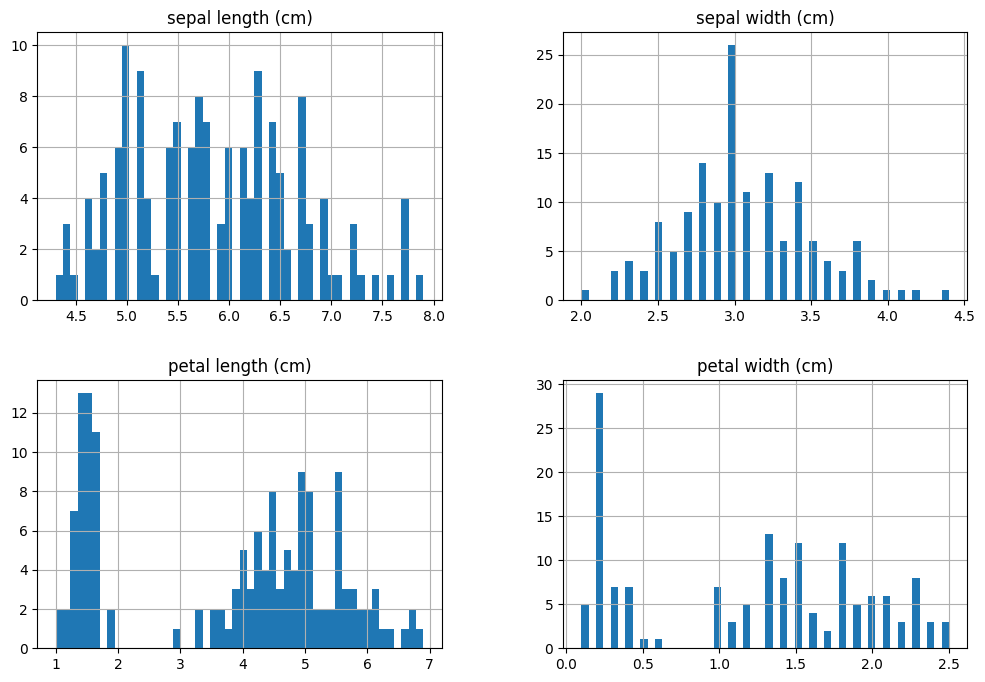

In [8]:
iris_df.hist(bins=50,figsize=(12,8))

In [9]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [10]:
import seaborn as sb

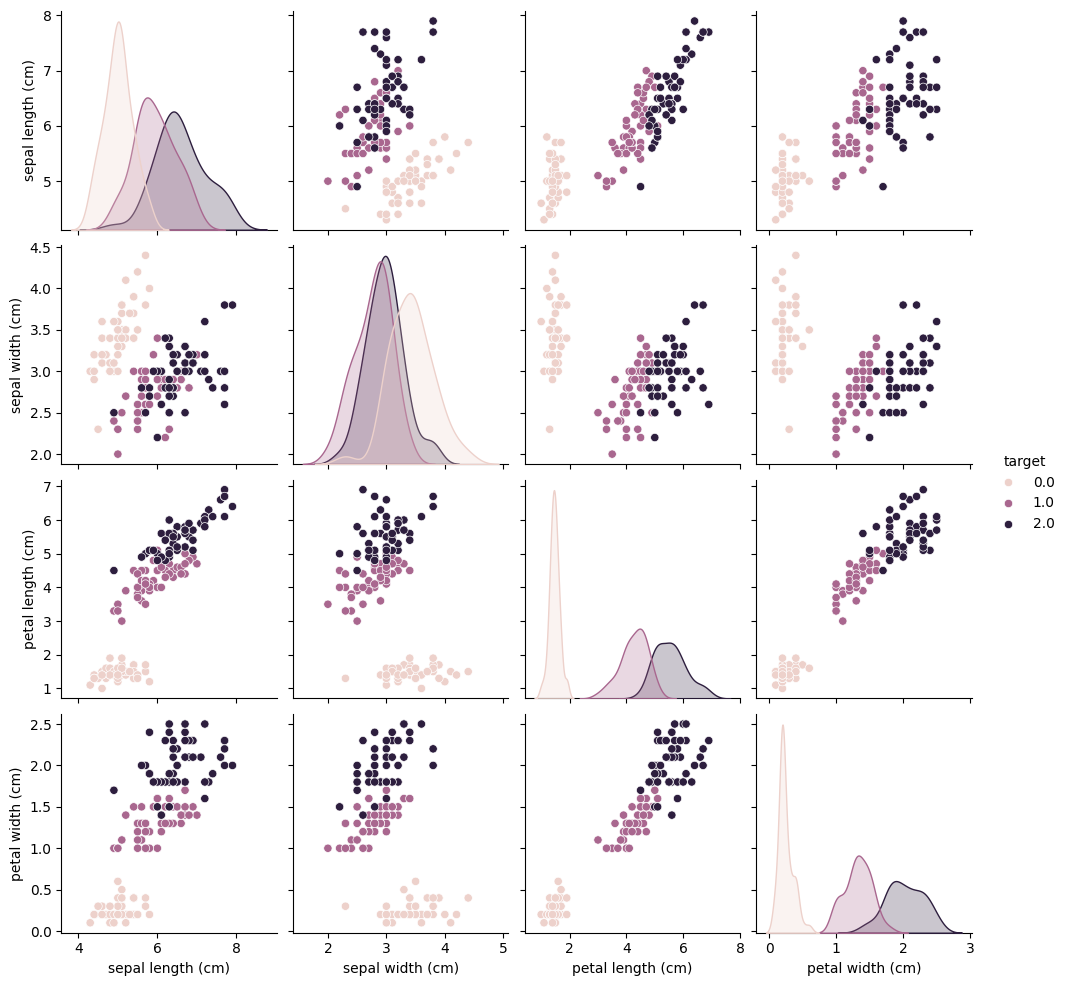

In [11]:
sb.pairplot(iris_df_all,hue='target')

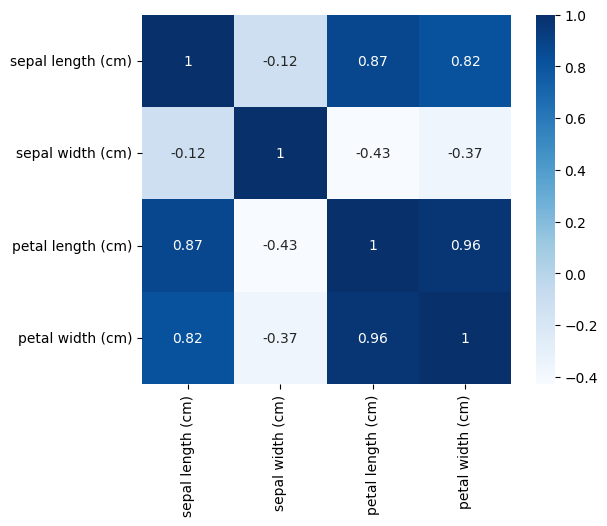

In [12]:
map=sb.heatmap(iris_df.corr(),cmap='Blues',annot=True,square=True)
map.set_ylim(0,len(iris_df.corr()))
map.invert_yaxis()

In [13]:
len(iris_df.corr())

4

<Axes: >

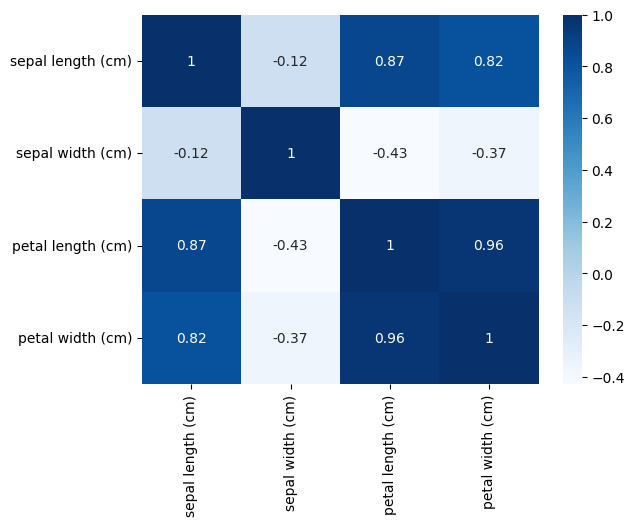

In [14]:
sb.heatmap(iris_df.corr(),cmap='Blues',annot=True)

In [15]:
iris_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [16]:
iris_df_all.target


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [17]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

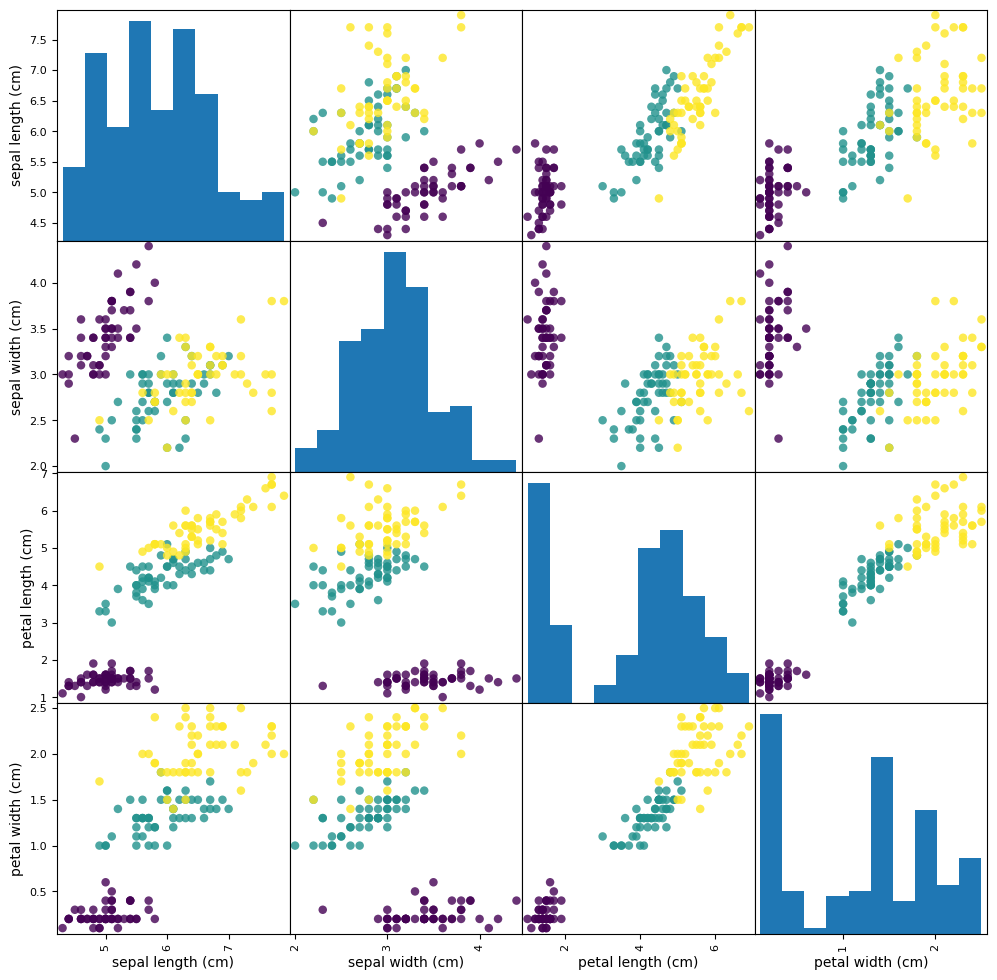

In [46]:
scatter_matrix(iris_df,figsize=(12,12),c=y,s=150,alpha=.8)


In [19]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,stratify=y)

In [135]:
pd.Series(y_train).value_counts()

1    30
2    30
0    30
Name: count, dtype: int64

In [136]:
pd.Series(y_test).value_counts()

1    20
2    20
0    20
Name: count, dtype: int64

In [23]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 1.0, '3-class classification (k=15 , weights="uniform")')

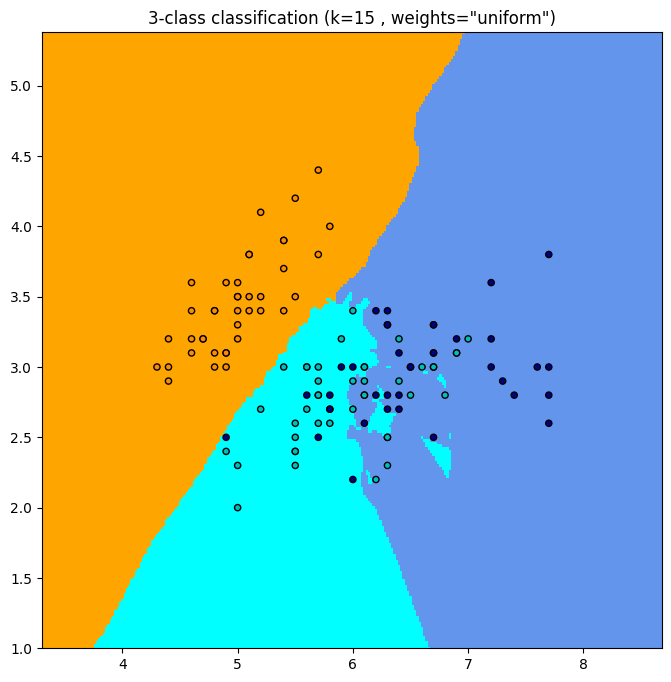

In [48]:
#def plot_knn_decision_boundary():
n_neighbors=15
weight='uniform'

# color maps
cmap_light=ListedColormap(['orange','cyan','cornflowerblue'])
cmap_bold=ListedColormap(['darkorange','c','darkblue'])

x_t=x_train[:,:2] # take the first two features for plotting in 2d
h=.02 # step size in mesh
knn_p=KNeighborsClassifier(n_neighbors= n_neighbors,weights=weight)
knn_p.fit(x_t,y_train)

x_min,x_max=x_t[:,0].min()-1,x_t[:,0].max()+1
y_min,y_max=x_t[:,1].min()-1,x_t[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

z=knn_p.predict(np.c_[xx.ravel(),yy.ravel()])

# put the result into a color plot
z=z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx,yy,z,cmap=cmap_light)

# plot the training points
plt.scatter(x_t[:,0],x_t[:,1],c=y_train,cmap=cmap_bold,edgecolors='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('3-class classification (k=%i , weights="%s")'% (n_neighbors,weight))


In [55]:
xx.shape

(220, 270)

In [58]:
xx.ravel().shape

(59400,)

In [60]:
yy.shape

(220, 270)

In [62]:
yy.ravel().shape

(59400,)

In [64]:
np.c_[xx.ravel(),yy.ravel()].shape

(59400, 2)

In [26]:
x[0:5,0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [27]:
x_train[:,0].min()-1

3.3

In [28]:
np.arange(1,11,.3)

array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
        4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
        7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. , 10.3, 10.6,
       10.9])

In [29]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
iris.data.ravel()

array([5.1, 3.5, 1.4, 0.2, 4.9, 3. , 1.4, 0.2, 4.7, 3.2, 1.3, 0.2, 4.6,
       3.1, 1.5, 0.2, 5. , 3.6, 1.4, 0.2, 5.4, 3.9, 1.7, 0.4, 4.6, 3.4,
       1.4, 0.3, 5. , 3.4, 1.5, 0.2, 4.4, 2.9, 1.4, 0.2, 4.9, 3.1, 1.5,
       0.1, 5.4, 3.7, 1.5, 0.2, 4.8, 3.4, 1.6, 0.2, 4.8, 3. , 1.4, 0.1,
       4.3, 3. , 1.1, 0.1, 5.8, 4. , 1.2, 0.2, 5.7, 4.4, 1.5, 0.4, 5.4,
       3.9, 1.3, 0.4, 5.1, 3.5, 1.4, 0.3, 5.7, 3.8, 1.7, 0.3, 5.1, 3.8,
       1.5, 0.3, 5.4, 3.4, 1.7, 0.2, 5.1, 3.7, 1.5, 0.4, 4.6, 3.6, 1. ,
       0.2, 5.1, 3.3, 1.7, 0.5, 4.8, 3.4, 1.9, 0.2, 5. , 3. , 1.6, 0.2,
       5. , 3.4, 1.6, 0.4, 5.2, 3.5, 1.5, 0.2, 5.2, 3.4, 1.4, 0.2, 4.7,
       3.2, 1.6, 0.2, 4.8, 3.1, 1.6, 0.2, 5.4, 3.4, 1.5, 0.4, 5.2, 4.1,
       1.5, 0.1, 5.5, 4.2, 1.4, 0.2, 4.9, 3.1, 1.5, 0.2, 5. , 3.2, 1.2,
       0.2, 5.5, 3.5, 1.3, 0.2, 4.9, 3.6, 1.4, 0.1, 4.4, 3. , 1.3, 0.2,
       5.1, 3.4, 1.5, 0.2, 5. , 3.5, 1.3, 0.3, 4.5, 2.3, 1.3, 0.3, 4.4,
       3.2, 1.3, 0.2, 5. , 3.5, 1.6, 0.6, 5.1, 3.8, 1.9, 0.4, 4.

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

Accuracy: 0.9666666666666667


Confusion Matrix:
 Predicted   setosa  versicolor  virginica
Actual                                   
setosa          10           0          0
versicolor       0          10          0
virginica        0           1          9

len cm: 3


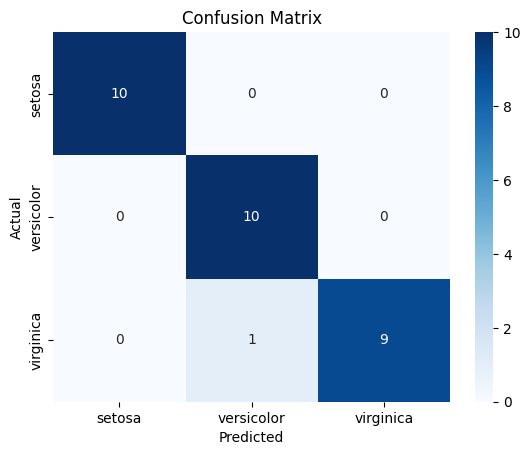

In [65]:
#def create_example_knn():
knn=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
print(knn.fit(x_train,y_train))
y_predict=knn.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test,y_predict),index=iris.target_names,columns=iris.target_names)
cm.index.name='Actual'
cm.columns.name='Predicted'

print('\nAccuracy: {}\n\n'.format(accuracy_score(y_test,y_predict)))
print('Confusion Matrix:\n {}'.format(cm))

axs=sb.heatmap(cm,cmap='Blues',annot=True)
axs.set_ylim(0,len(cm))
axs.invert_yaxis()
plt.title('Confusion Matrix')

print('\nlen cm: {}'.format(len(cm)))

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
#cv_accuracies_all_df=pd.DataFrame()


optimal k: 13 with cv score of 0.9749999999999999




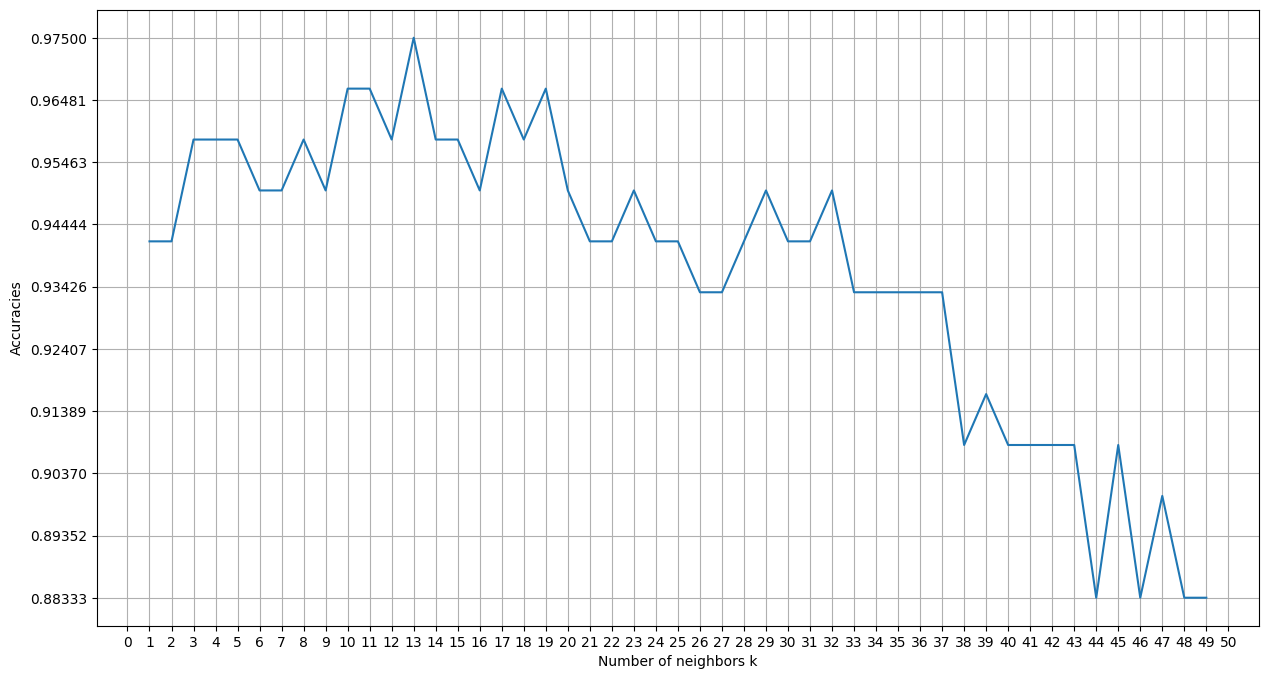

In [91]:


#def find_optimal_k():
cv_accuracies=[]
cv_accuracies_all=[]
k_values=list(range(1,50))


for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    accuracies=cross_val_score(knn,x_train,y_train,cv=10)
    cv_accuracies.append(accuracies.mean())
    cv_accuracies_all.append(cross_val_score(knn,x_train,y_train,cv=10))

plt.figure(figsize=(15,8))    
plt.plot(k_values,cv_accuracies)
plt.xlabel('Number of neighbors k')
plt.ylabel('Accuracies')
plt.grid()
plt.xticks(np.arange(51))
plt.yticks(np.linspace(min(cv_accuracies),max(cv_accuracies),10))

optimal_k=k_values[cv_accuracies.index(max(cv_accuracies))]
print('\noptimal k: {} with cv score of {}\n\n'.format(optimal_k,max(cv_accuracies)))

global cv_accuracies_all_df
cv_accuracies_all_df=pd.DataFrame(cv_accuracies_all,index=np.arange(1,50),columns=np.arange(1,11))
#print(cv_accuracies_all_df)

In [84]:
min(cv_accuracies)

0.8833333333333332

In [86]:
max(cv_accuracies)

0.9749999999999999

In [88]:
accuracies


array([0.83333333, 0.91666667, 0.83333333, 0.91666667, 0.91666667,
       0.91666667, 0.91666667, 0.83333333, 0.83333333, 0.91666667])

In [72]:
pd.DataFrame(cv_accuracies)

,0
0,0.941667
1,0.941667
2,0.958333
3,0.958333
4,0.958333
5,0.950000
6,0.950000
7,0.958333
8,0.950000
9,0.966667


In [38]:
cv_accuracies_all_df

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.916667,0.916667,0.833333,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
2,1.000000,0.916667,1.000000,0.833333,0.833333,1.000000,1.000000,0.916667,0.916667,1.000000
3,1.000000,0.916667,1.000000,0.916667,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
4,1.000000,0.916667,1.000000,0.916667,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
5,1.000000,0.916667,1.000000,0.916667,1.000000,1.000000,1.000000,0.916667,0.916667,0.916667
6,1.000000,0.916667,0.916667,0.916667,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
7,1.000000,0.916667,0.916667,1.000000,0.916667,1.000000,1.000000,0.916667,0.916667,0.916667
8,1.000000,0.916667,0.916667,1.000000,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000
9,1.000000,0.916667,0.916667,1.000000,0.916667,1.000000,1.000000,0.916667,0.916667,0.916667
10,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,1.000000,0.916667,0.916667,1.000000


In [40]:
cv_accuracies_all_df.T

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.833333,0.916667,0.833333,0.833333,0.833333,0.833333
2,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
3,0.916667,1.000000,1.000000,1.000000,1.000000,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
4,0.833333,0.833333,0.916667,0.916667,0.916667,0.916667,1.000000,1.000000,1.000000,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
5,0.916667,0.833333,0.916667,0.916667,1.000000,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,0.916667
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,0.916667
8,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
9,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
10,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667


In [41]:
cv_accuracies_all_df.T.describe()

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.941667,0.941667,0.958333,0.958333,0.958333,0.950000,0.950000,0.958333,0.950000,0.966667,...,0.908333,0.908333,0.908333,0.908333,0.883333,0.908333,0.883333,0.900000,0.883333,0.883333
std,0.056246,0.068606,0.043921,0.043921,0.043921,0.043033,0.043033,0.043921,0.043033,0.043033,...,0.061489,0.061489,0.061489,0.061489,0.043033,0.061489,0.043033,0.065734,0.043033,0.043033
min,0.833333,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
25%,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.854167,0.854167,0.854167,0.854167,0.833333,0.854167,0.833333,0.833333,0.833333,0.833333
50%,0.916667,0.958333,0.958333,0.958333,0.958333,0.916667,0.916667,0.958333,0.916667,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.916667,1.000000,0.916667,0.916667


In [42]:
list(range(1,50))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [43]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [44]:
list(np.arange(1,50))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [142]:
#def find_optimaal_k_and_distance():
distances=['manhattan','euclidean','chebyshev']
k_values=list(range(1,50))
cv_results={}
max_accuracy=0

for distance in distances:
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k,metric=distance)
        accuracy=cross_val_score(knn,x_train,y_train,cv=10).mean()
        cv_results[(distance,k)]=accuracy
        
        if accuracy>max_accuracy: # +0.000001 is deleted
            max_accuracy=accuracy
            max_params=(distance,k)
            
print('Optimal hyperparameter:{}'.format(max_params))
print('With cross validation score of:{:.10f}'.format(max_accuracy))

Optimal hyperparameter:('manhattan', 17)
With cross validation score of:0.9666666667


KNeighborsClassifier(metric='manhattan', n_neighbors=17)

Accuracy:93.33333333333333

Confusion matrix:
            setosa  versicolor  virginica
setosa          20           0          0
versicolor       0          19          1
virginica        0           3         17




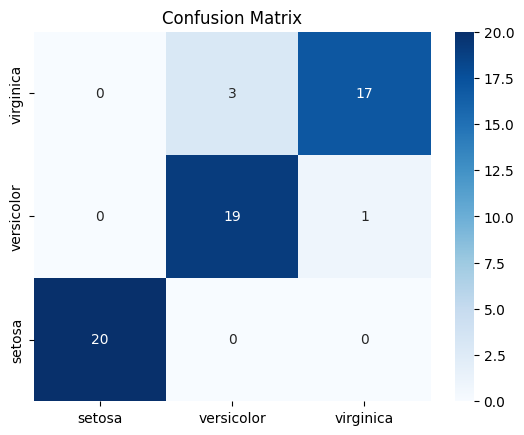

In [143]:
#def train_and_test_final_model
knn=KNeighborsClassifier(n_neighbors=17,metric='manhattan')
knn.fit(x_train,y_train)
print(knn)

y_predict=knn.predict(x_test)
cm=pd.DataFrame(confusion_matrix(y_test,y_predict),index=iris.target_names,columns=iris.target_names)

print('\nAccuracy:{}\n'.format(accuracy_score(y_test,y_predict)*100))
print('Confusion matrix:\n{}\n\n'.format(cm))

axs=sb.heatmap(cm,cmap='Blues',annot=True,square=False)
plt.title('Confusion Matrix')
axs.invert_yaxis()
axs.set_ylim(0,len(cm))

plt.show()

In [144]:
cm

,setosa,versicolor,virginica
setosa,20,0,0
versicolor,0,19,1
virginica,0,3,17


In [145]:
len(cm)

3

In [146]:
from sklearn.neighbors import KNeighborsRegressor

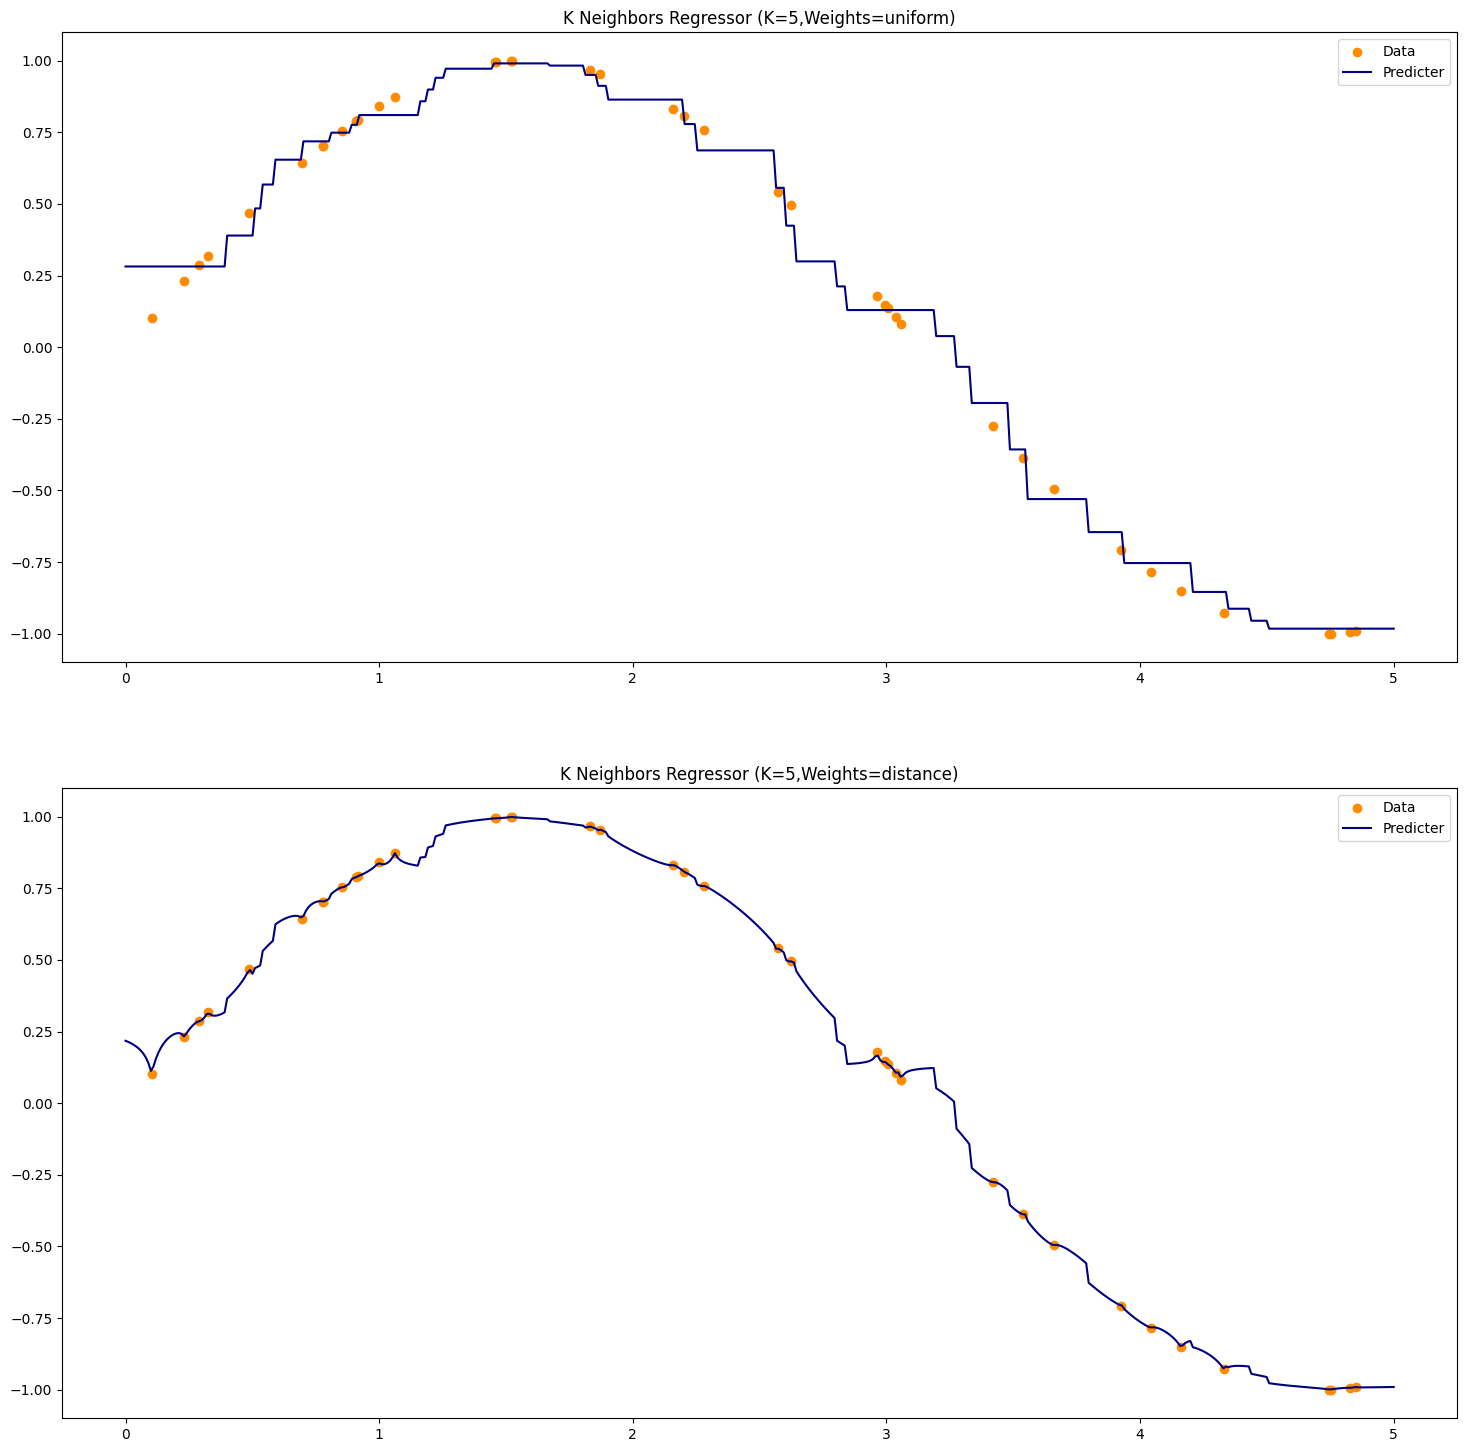

In [273]:
#generate sample data
np.random.seed(42)
X=np.sort(5*np.random.rand(40,1),axis=0)
Y=np.sin(X).ravel()
T=np.linspace(0,5,500)[:,np.newaxis]

#fit regression model
plt.figure(figsize=(18,18))

for i,weight in enumerate(['uniform','distance']):
    knn=KNeighborsRegressor(n_neighbors=5,weights=weight)
    y_predict=knn.fit(X,Y).predict(T)
    plt.subplot(2,1,i+1)
    plt.scatter(X,Y,c='darkorange',label='Data')
    plt.plot(T,y_predict,c='navy',label='Predicter')
    plt.axis('tight')
    plt.legend()
    plt.title('K Neighbors Regressor (K=5,Weights={})'.format(weight))

In [199]:
X

array([[0.10292247],
       [0.23225206],
       [0.29041806],
       [0.32525796],
       [0.48836057],
       [0.6974693 ],
       [0.7799726 ],
       [0.7800932 ],
       [0.85262062],
       [0.90912484],
       [0.91702255],
       [0.99836891],
       [1.06169555],
       [1.4561457 ],
       [1.46072324],
       [1.52121121],
       [1.52306885],
       [1.83180922],
       [1.87270059],
       [2.15972509],
       [2.20076247],
       [2.28034992],
       [2.57117219],
       [2.62378216],
       [2.96207284],
       [2.99329242],
       [3.00557506],
       [3.03772426],
       [3.05926447],
       [3.42116513],
       [3.54036289],
       [3.65996971],
       [3.92587981],
       [4.04198674],
       [4.1622132 ],
       [4.33088073],
       [4.74442769],
       [4.75357153],
       [4.82816017],
       [4.84954926]])

In [200]:
T

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016],
       [0.0501002 ],
       [0.06012024],
       [0.07014028],
       [0.08016032],
       [0.09018036],
       [0.1002004 ],
       [0.11022044],
       [0.12024048],
       [0.13026052],
       [0.14028056],
       [0.1503006 ],
       [0.16032064],
       [0.17034068],
       [0.18036072],
       [0.19038076],
       [0.2004008 ],
       [0.21042084],
       [0.22044088],
       [0.23046092],
       [0.24048096],
       [0.250501  ],
       [0.26052104],
       [0.27054108],
       [0.28056112],
       [0.29058116],
       [0.3006012 ],
       [0.31062124],
       [0.32064128],
       [0.33066132],
       [0.34068136],
       [0.3507014 ],
       [0.36072144],
       [0.37074148],
       [0.38076152],
       [0.39078156],
       [0.4008016 ],
       [0.41082164],
       [0.42084168],
       [0.43086172],
       [0.44088176],
       [0.4509018 ],
       [0.46092184],
       [0.470

In [201]:
Y

array([ 0.10274086,  0.2301697 ,  0.2863528 ,  0.31955324,  0.46917873,
        0.64228004,  0.70325994,  0.70334567,  0.75300739,  0.78896631,
        0.7937943 ,  0.84058858,  0.87318314,  0.99343481,  0.99394807,
        0.99877091,  0.99886126,  0.96612909,  0.95477201,  0.83153619,
        0.80804746,  0.75865278,  0.53998599,  0.49497885,  0.17855712,
        0.14775724,  0.13559858,  0.10368173,  0.08223521, -0.27594475,
       -0.38828536, -0.49547106, -0.70632074, -0.78357182, -0.85243263,
       -0.92810414, -0.9994868 , -0.99915212, -0.993306  , -0.99060827])

In [239]:
Y[::5]

array([ 0.10274086,  0.64228004,  0.7937943 ,  0.99877091,  0.80804746,
        0.14775724, -0.38828536, -0.92810414])

In [240]:
np.random.seed(42)
np.random.rand(8)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615])

In [241]:
np.random.seed(42)
1*(.5-np.random.rand(8))

array([ 0.12545988, -0.45071431, -0.23199394, -0.09865848,  0.34398136,
        0.34400548,  0.44191639, -0.36617615])

In [242]:
Y[::5] += 1*(.5-np.random.rand(8))

In [243]:
Y[::5]

array([ 0.00162585,  0.43420746,  1.2732098 ,  0.52886106,  0.47560481,
        0.43541813, -0.07011033, -0.61150865])